In [1]:
%pip install dython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from dython.nominal import associations

In [3]:
df = pd.read_csv(r'C:\Users\Rodrigo Lapsky\Documents\Dados\DataSets\Salary\Salary Data.csv')
df_copy = df.copy()

In [4]:
print(df.shape)
df.head(6)

(375, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0


In [5]:
print(df.duplicated().sum())
print(df.isnull().sum())

50
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df[df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [11]:
values=[]
for i in df.columns[0:7].tolist():
     print(i, ':', len(df[i].astype(str).value_counts()))
     values.append(len(df[i].astype(str).value_counts()))

Age : 31
Gender : 2
Education Level : 3
Job Title : 174
Years of Experience : 28
Salary : 36


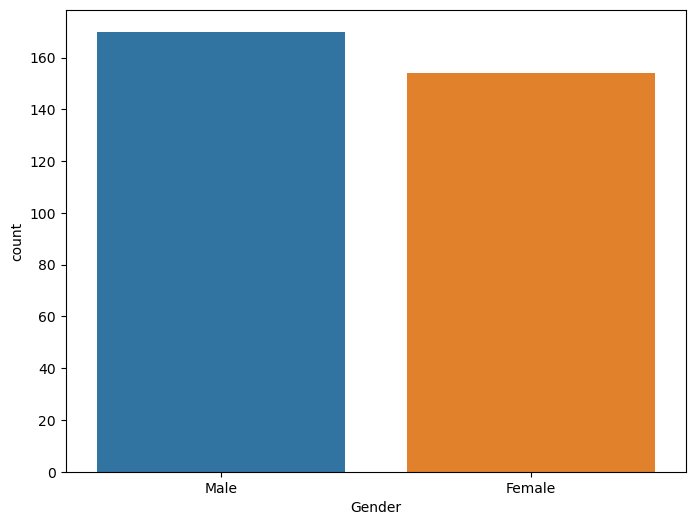

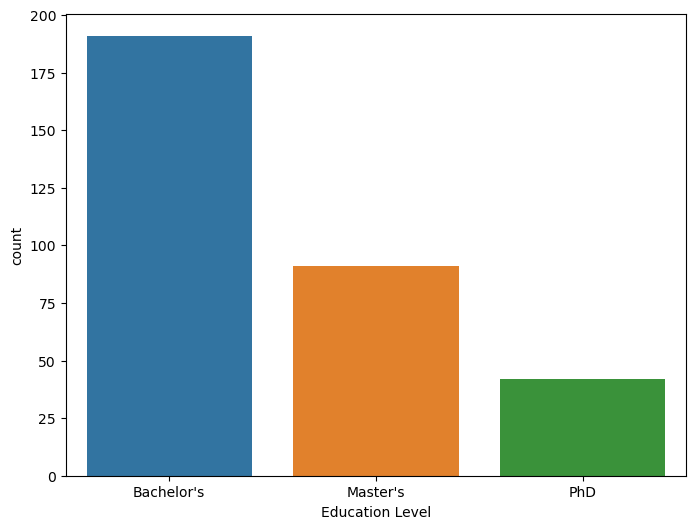

In [12]:
columns = ['Gender','Education Level']

for i in columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=i,palette='tab10')
    plt.show();                          

---

In [13]:
#All values from the job_title column
with pd.option_context('display.max_rows',None):
    display(df['Job Title'].value_counts(ascending=False).to_frame())

,count
Job Title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Business Analyst,6
Junior Financial Analyst,6
Senior Data Scientist,6
Senior Financial Analyst,6
Senior Product Manager,5


In [14]:
#All values from the Salary column
with pd.option_context('display.max_rows',None):
    display(df['Salary'].value_counts(ascending=False).to_frame())

,count
Salary,
40000.0,26
120000.0,20
50000.0,19
95000.0,18
45000.0,18
180000.0,17
90000.0,15
110000.0,14
160000.0,14


In [15]:
#All values from the Years of Experience column
with pd.option_context('display.max_rows',None):
    display(df['Years of Experience'].value_counts(ascending=False).to_frame())

,count
Years of Experience,
3.0,27
2.0,26
9.0,19
8.0,17
5.0,16
7.0,16
4.0,16
10.0,16
16.0,15


---

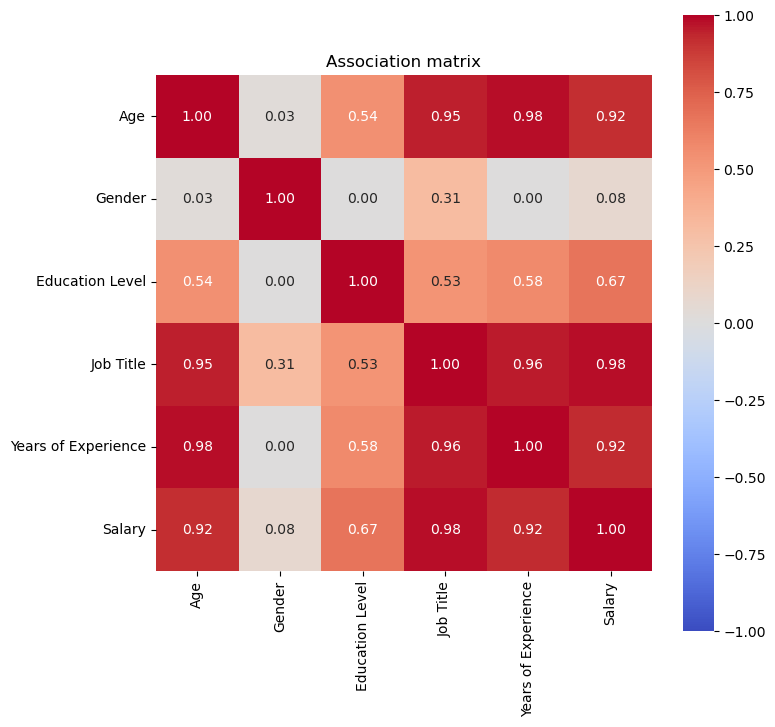

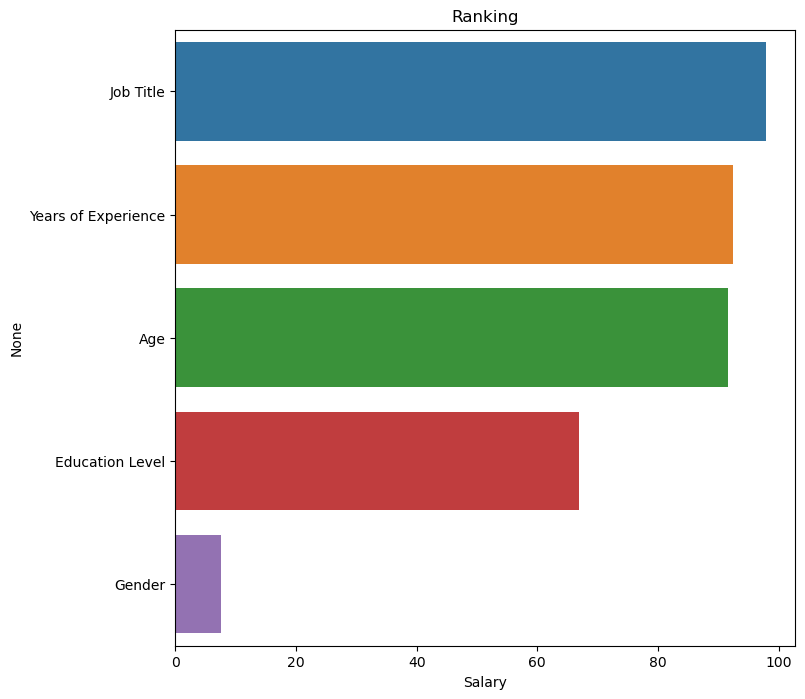

In [16]:
#Correlation matrix using Dython to analyze categorical columns without manual encoding
res = associations(df,
                   figsize=(8,8),
                   cmap='coolwarm',
                   title="Association matrix",
                  plot=True)

corr_matrix = res['corr']
ranking = (corr_matrix[['Salary']].abs()*100).sort_values(by='Salary',ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=ranking['Salary'].iloc[1:],
            y=ranking.index[1:],
            palette='tab10')

plt.title("Ranking")
plt.show();

---

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# DATA ENGINEERING

In [18]:
df = pd.get_dummies(df,columns=['Gender'], drop_first=True)
df['Education Level'] = df['Education Level'].map({"Bachelor's":1,"Master's":2,'PhD':3})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Education Level      324 non-null    int64  
 2   Job Title            324 non-null    object 
 3   Years of Experience  324 non-null    float64
 4   Salary               324 non-null    float64
 5   Gender_Male          324 non-null    bool   
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 15.5+ KB


---

In [20]:
with pd.option_context('display.max_rows',None):
    display(df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).to_frame())

,Salary
Job Title,
CEO,250000.000000
Chief Technology Officer,250000.000000
Chief Data Officer,220000.000000
Director,200000.000000
VP of Finance,200000.000000
VP of Operations,190000.000000
Research Director,190000.000000
Operations Director,190000.000000
Director of Human Resources,187500.000000


In [21]:
#Applied Target Encoding to the 'job_title' column by replacing categories with their respective mean salary
mean = df.groupby('Job Title')['Salary'].mean()
df['Job Title_mean'] = df['Job Title'].map(mean)

df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Male,Job Title_mean
0,32.0,1,Software Engineer,5.0,90000.0,True,90000.0
1,28.0,2,Data Analyst,3.0,65000.0,False,72500.0
2,45.0,3,Senior Manager,15.0,150000.0,True,160000.0
3,36.0,1,Sales Associate,7.0,60000.0,False,50000.0
4,52.0,2,Director,20.0,200000.0,True,200000.0


In [22]:
#Converted gender into a binary variable to optimize it for Linear Regression.
df ['Gender_Male'] = df ['Gender_Male'].astype(int)

In [23]:
df.drop(columns = ['Job Title'],inplace=True)
df.head()

,Age,Education Level,Years of Experience,Salary,Gender_Male,Job Title_mean
0,32.0,1,5.0,90000.0,1,90000.0
1,28.0,2,3.0,65000.0,0,72500.0
2,45.0,3,15.0,150000.0,1,160000.0
3,36.0,1,7.0,60000.0,0,50000.0
4,52.0,2,20.0,200000.0,1,200000.0


In [24]:
df = df[['Age','Gender_Male','Education Level','Years of Experience','Job Title_mean','Salary']]
df.head()       

,Age,Gender_Male,Education Level,Years of Experience,Job Title_mean,Salary
0,32.0,1,1,5.0,90000.0,90000.0
1,28.0,0,2,3.0,72500.0,65000.0
2,45.0,1,3,15.0,160000.0,150000.0
3,36.0,0,1,7.0,50000.0,60000.0
4,52.0,1,2,20.0,200000.0,200000.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender_Male          324 non-null    int64  
 2   Education Level      324 non-null    int64  
 3   Years of Experience  324 non-null    float64
 4   Job Title_mean       324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 17.7 KB


---

<Axes: ylabel='Years of Experience'>

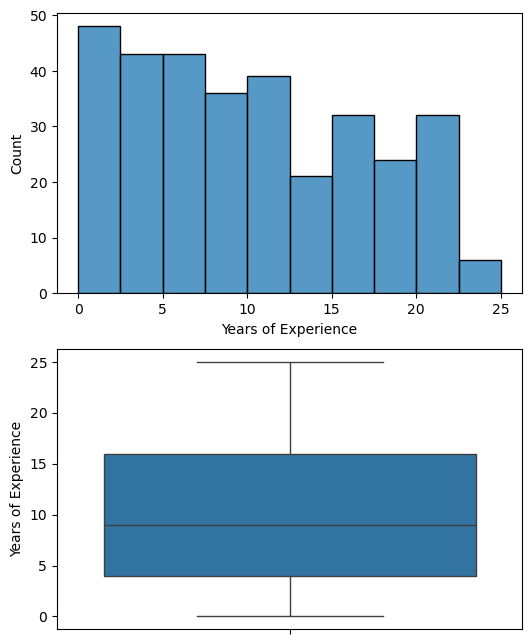

In [26]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(df['Years of Experience'])

plt.subplot(2,1,2)
sns.boxplot(df['Years of Experience'])

<Axes: ylabel='Job Title_mean'>

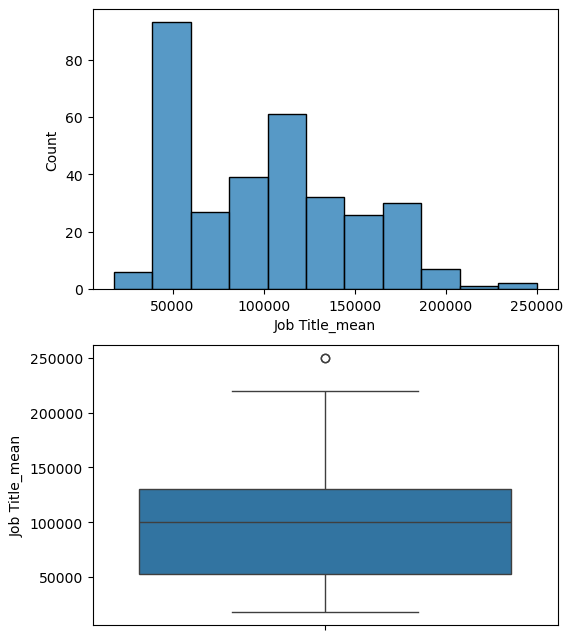

In [27]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(df['Job Title_mean'])

plt.subplot(2,1,2)
sns.boxplot(df['Job Title_mean'])

<Axes: ylabel='Salary'>

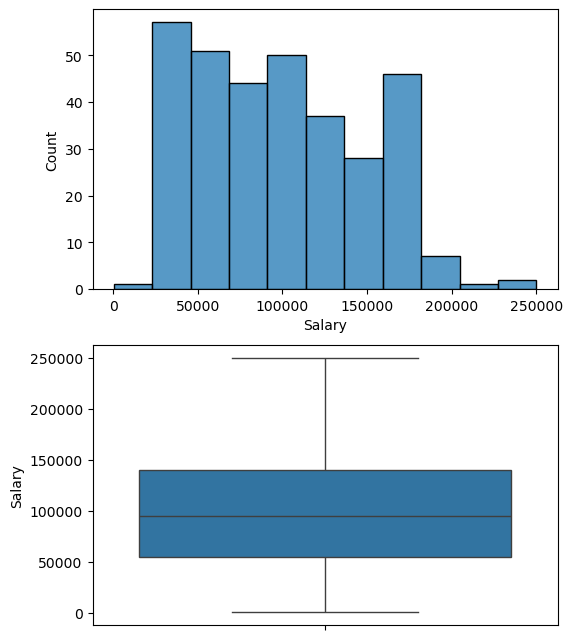

In [28]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(df['Salary'])

plt.subplot(2,1,2)
sns.boxplot(df['Salary'])

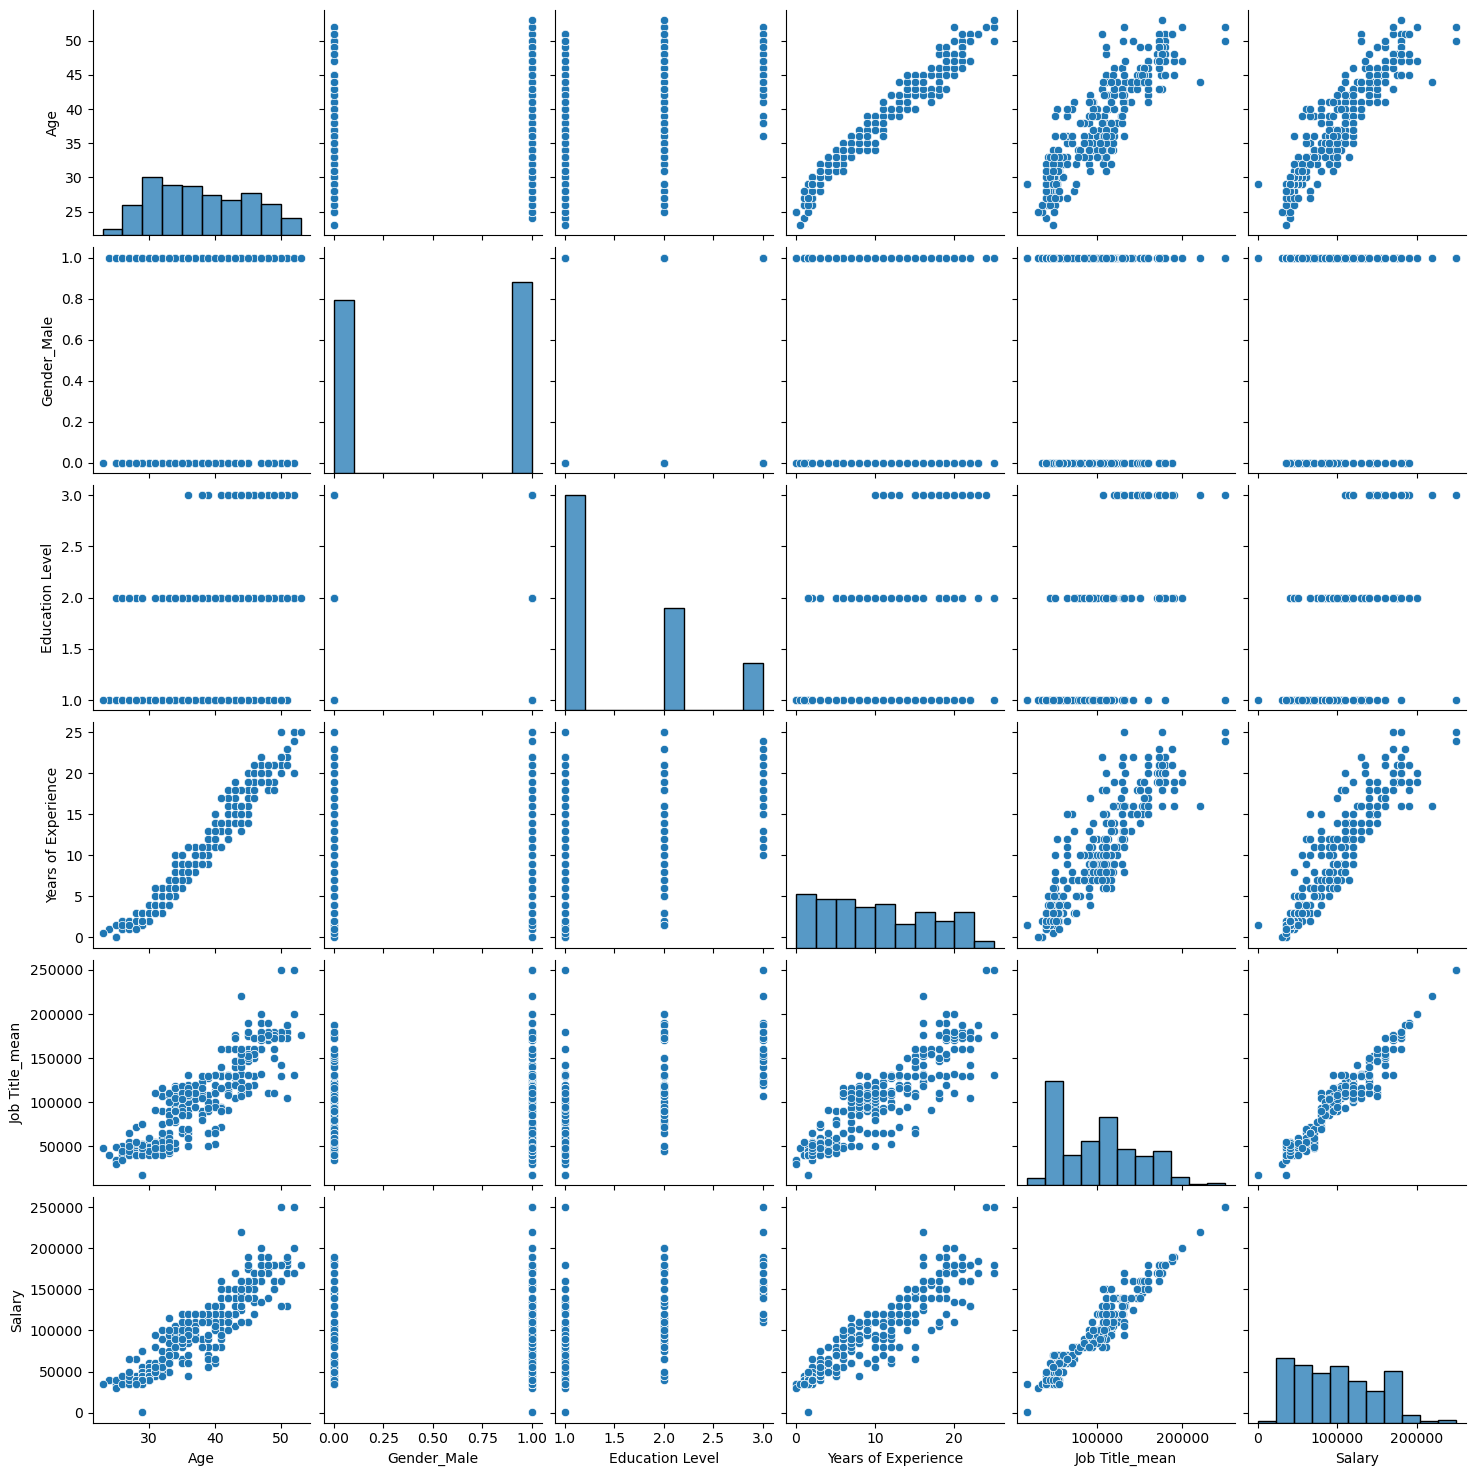

In [29]:
sns.pairplot(df)

---

# TRAIN_TEST_SPLIT

In [30]:
X = df.drop('Salary',axis=1)
Y = df['Salary']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [32]:
print(x_train.shape)
print(x_test.shape)

(226, 5)
(98, 5)


In [33]:
print(y_train.shape)
print(y_test.shape)

(226,)
(98,)


---

## ALGORITHMS

In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predictlr = lr.predict(x_test)
r2lr = r2_score(y_test,predictlr)

print(f"coeficient: {r2lr*100:.2f}")

coeficient: 96.43


In [35]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predictrf = rf.predict(x_test)
r2rf = r2_score(y_test,predictrf)

print(f"coeficient: {r2rf*100:.2f}")

coeficient: 95.66


In [36]:
kn =  KNeighborsRegressor()
kn.fit(x_train,y_train)
predictkn = kn.predict(x_test)
r2kn = r2_score(y_test,predictkn)

print(f"coeficient: {r2kn*100:.2f}")

coeficient: 94.22


In [37]:
r = Ridge()
r.fit(x_train,y_train)
predictr = r.predict(x_test)
r2r = r2_score(y_test,predictr)

print(f"coeficient: {r2r*100:.2f}")

coeficient: 96.45


In [38]:
en = ElasticNet()
en.fit(x_train,y_train)
predicten = en.predict(x_test)
r2en = r2_score(y_test,predicten)

print(f"coeficient: {r2en*100:.2f}")

coeficient: 96.94


In [39]:
l = Lasso()
l.fit(x_train,y_train)
predictl = l.predict(x_test)
r2l = r2_score(y_test,predictl)

print(f"coeficient: {r2l*100:.2f}")

coeficient: 96.43


---

# MODEL

In [40]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1],
    'max_iter': [5000]}

grid = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

print(f"Best R2: {grid.best_score_:.2f}")
print(f"Best Parameters: {grid.best_params_}")

Best R2: 0.97
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 5000}


In [41]:
model = ElasticNet(alpha=0.1,
                   l1_ratio=0.9)
model.fit(x_train,y_train)
predict_model = model.predict(x_test)
r2_model = r2_score(y_test,predict_model)

print(f"coeficient: {r2_model*100:.2f}")

coeficient: 96.47


---

# REGRESSION RESULTS GRAPHIC

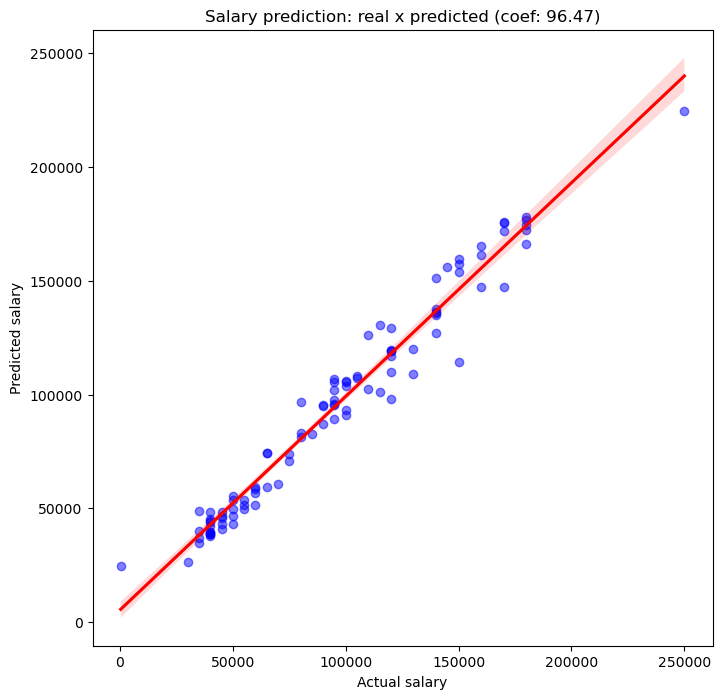

In [42]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_test,
            y=predict_model,
            scatter_kws={'alpha':0.5,'color':'blue'},
            line_kws={'color':'red'})
plt.title(f"Salary prediction: real x predicted (coef: {r2_model*100:.2f})")
plt.xlabel("Actual salary")
plt.ylabel("Predicted salary")
plt.show();

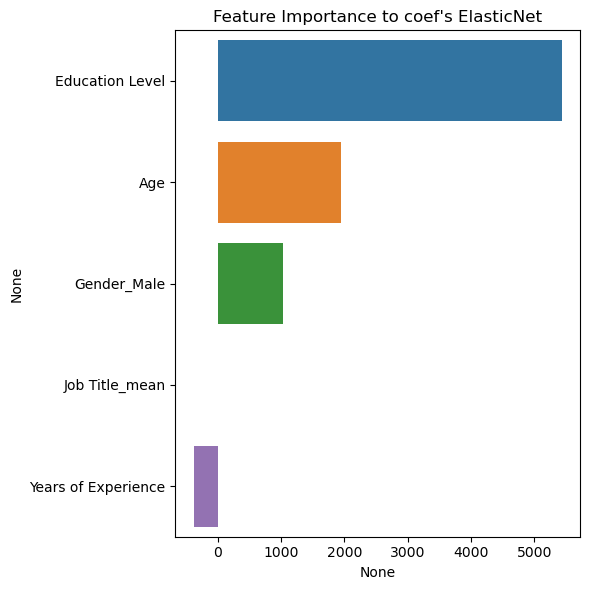

Education Level        5430.210634
Age                    1949.500642
Gender_Male            1025.144775
Job Title_mean            0.723537
Years of Experience    -378.173285
dtype: float64

In [43]:
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=model.coef_, 
                        index=X.columns,)
                       
importances = importances.sort_values(ascending=False)
sns.barplot(x=importances, 
            y=importances.index, 
            orient='h',
            palette='tab10')
plt.title("Feature Importance to coef's ElasticNet")
plt.show();

importances.sort_values(ascending=False)

---

In [46]:
import joblib
joblib.dump(model,'Model_Elastic.pkl') 

['Model_Elastic.pkl']

In [46]:
df_copy.dropna(inplace=True)
df_copy.drop_duplicates(inplace=True)

In [47]:
jobs = df_copy.groupby('Job Title')['Salary'].mean().reset_index()
jobs.columns =  ['job_title', 'salary_mean']
jobs.to_csv('jobs.csv', index=False)